# IMPORTS

In [1]:
from make_plots import plot_activity,create_corr_matrix,cluster3D,cluster2D,plot_histograms_qqplots,boxplot,cluster3D,cluster2D,mean_and_std
from data_pre import create_dataframe,normal_data_Standard,window_data,get_balanced_dataset,remove_duplicates,remove_outliersIQR,descritize_by_bounds,data_agg,pca_test,normal_data_MinMax
from classification_models import bay_net_structure,random_forest,nn
from clustering import minibatch_kmeans,dbscan,birch
import numpy as np
import pandas as pd

/home/lefteris/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-25 15:30:33.720084: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-25 15:30:33.741986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 15:30:34.058839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Create DataFrame

In [2]:
data=create_dataframe()
data=data.drop(columns=['index','Unnamed: 0'])


In [ ]:
print(data)

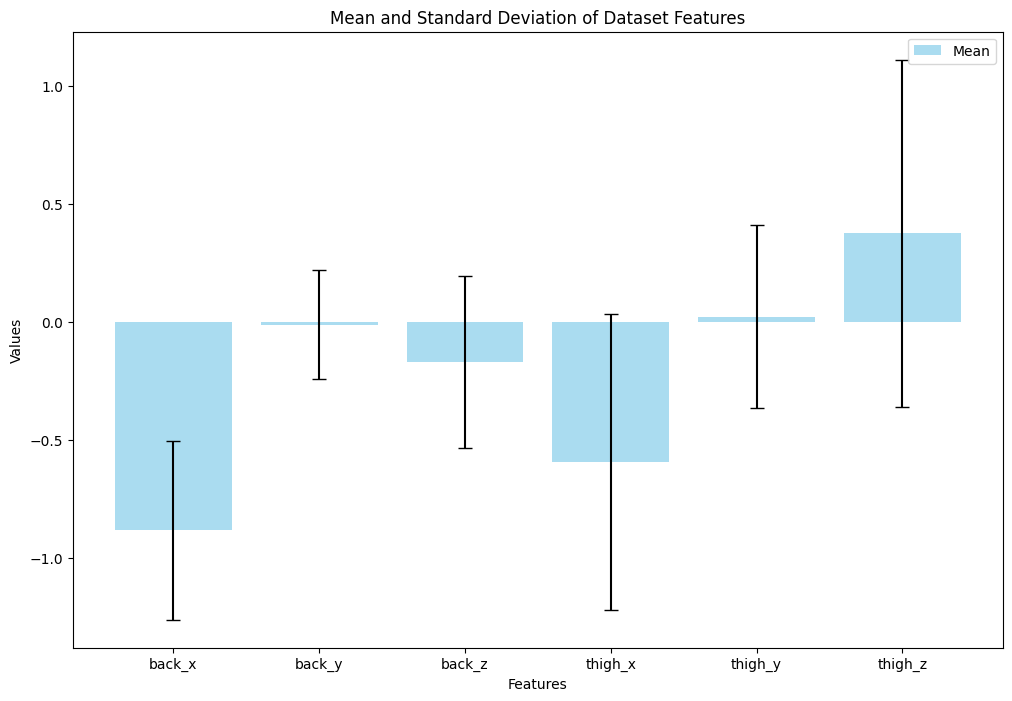

In [4]:
mean_and_std(data)

In [3]:
dnd=remove_duplicates(data)
print(data.shape)

(6461328, 9)


## Plot the number of data for each class

<Axes: title={'center': 'Training examples by activity type'}, xlabel='label'>

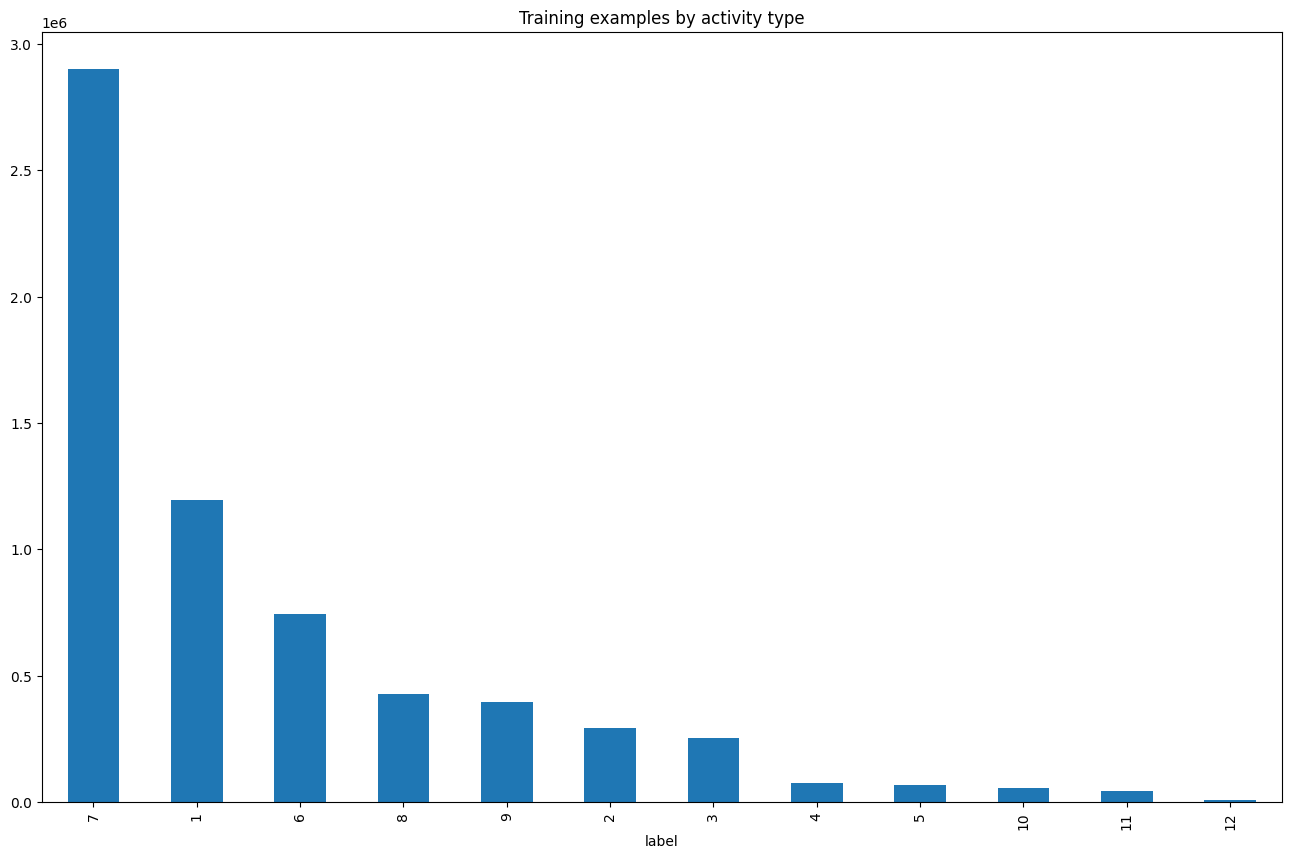

In [5]:
countofActivity=data['label'].value_counts()
countofActivity.plot(kind='bar', title='Training examples by activity type',figsize=(16,10))

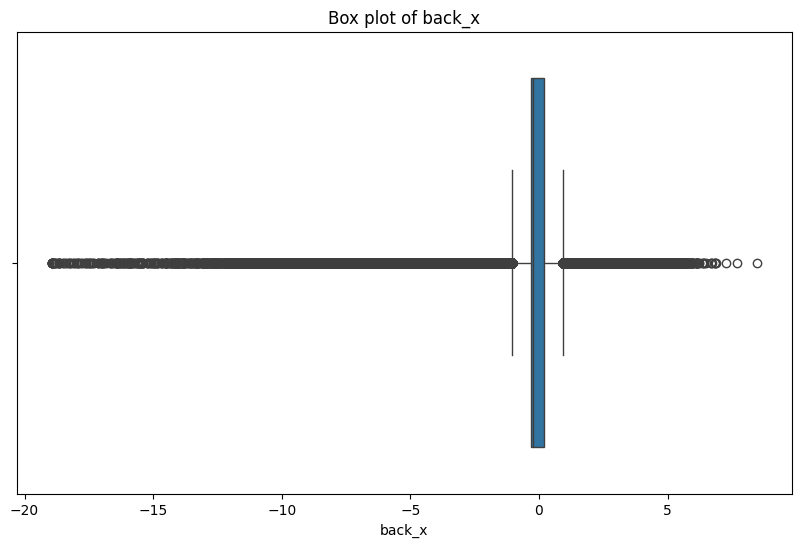

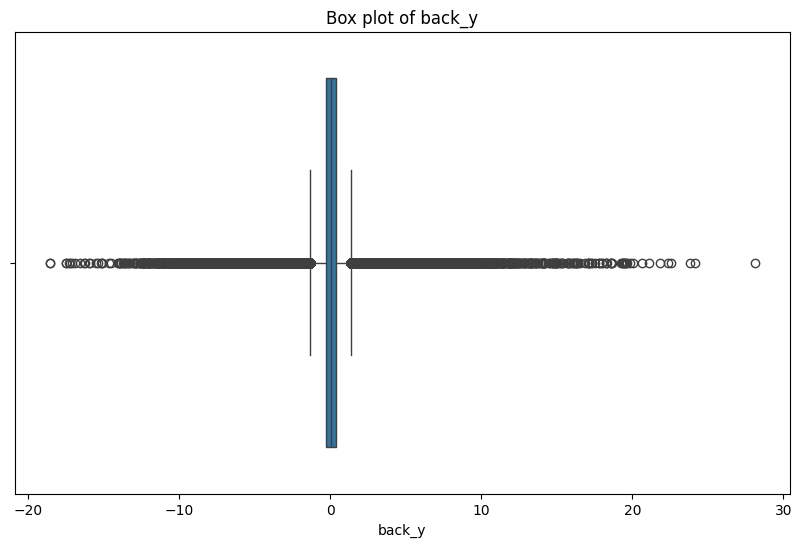

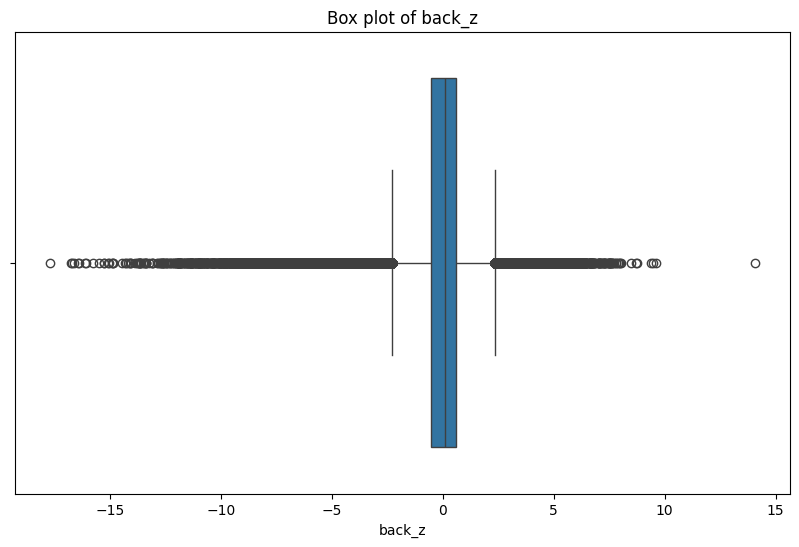

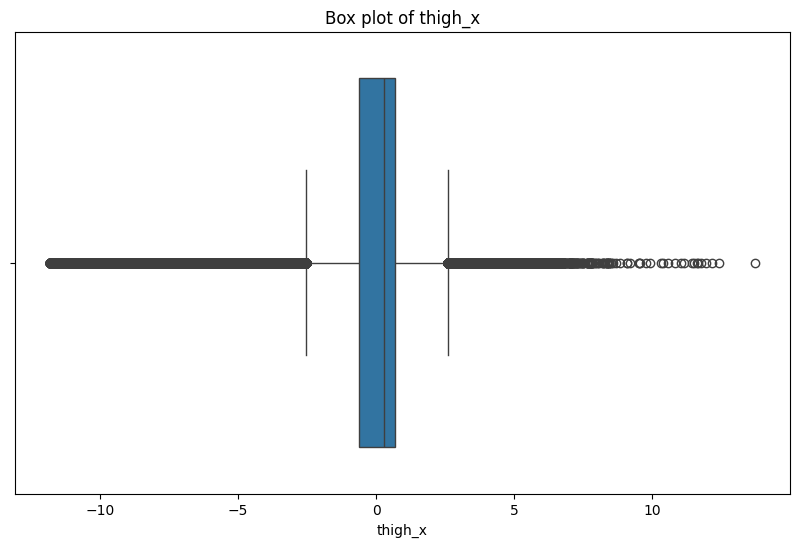

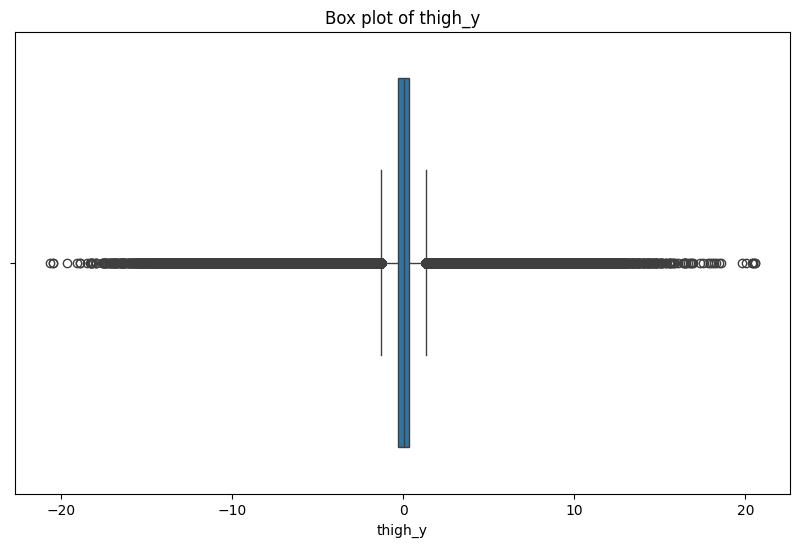

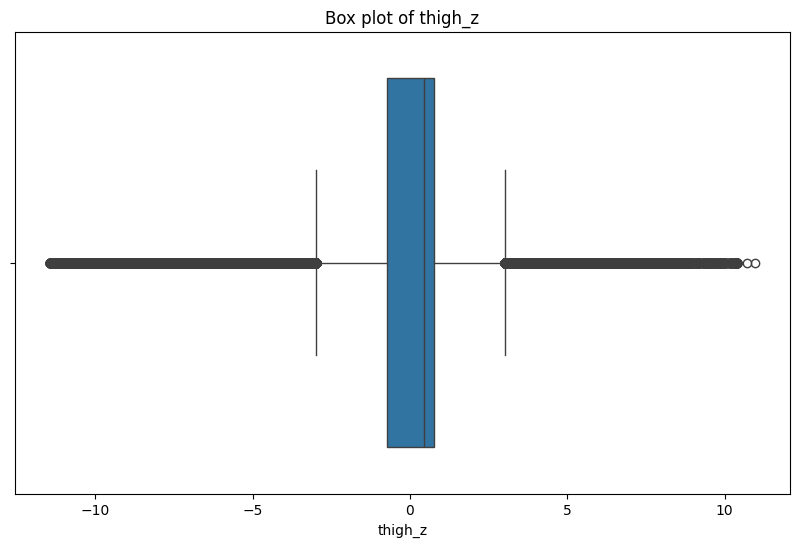

  Removed 91338 outliers
  Removed 244095 outliers
  Removed 846 outliers
  Removed 26035 outliers
  Removed 74910 outliers
  Removed 11247 outliers


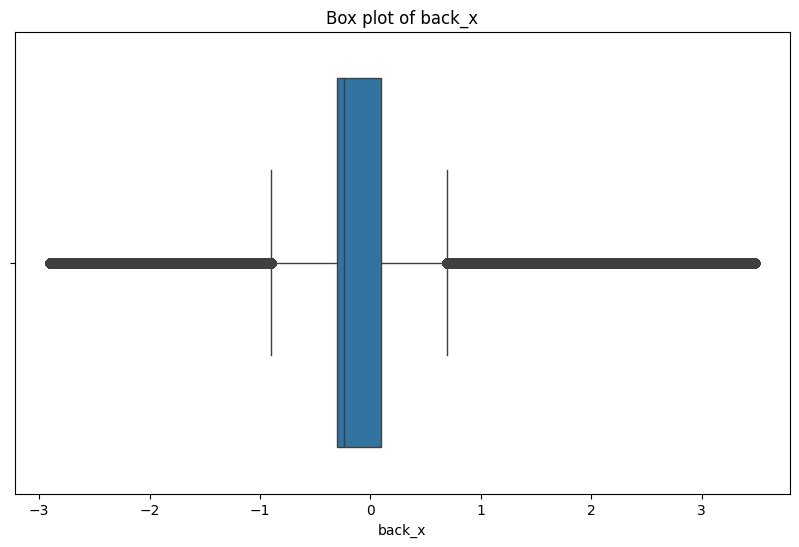

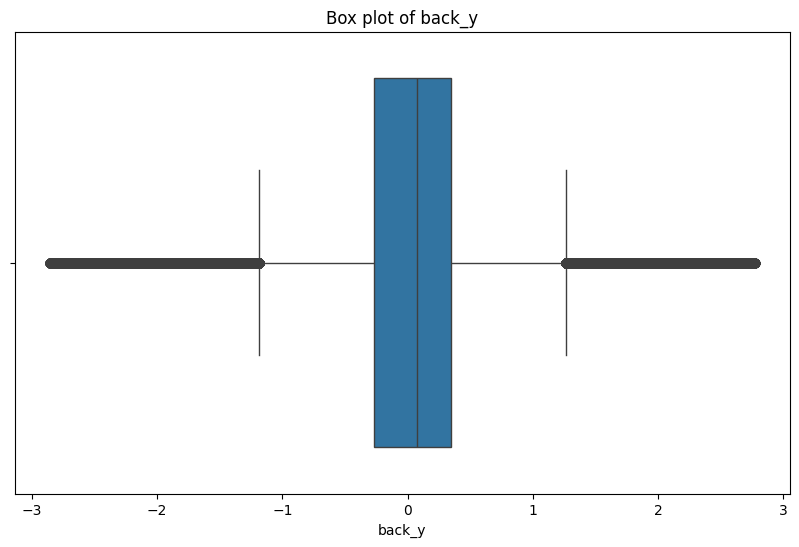

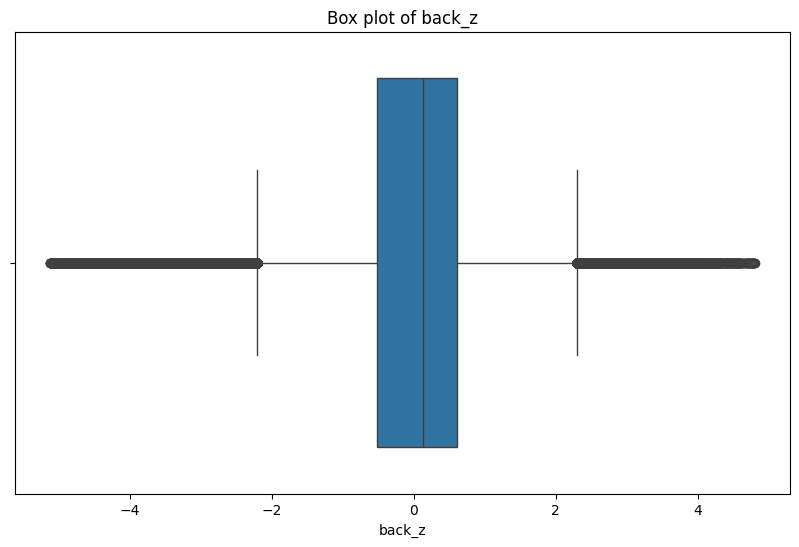

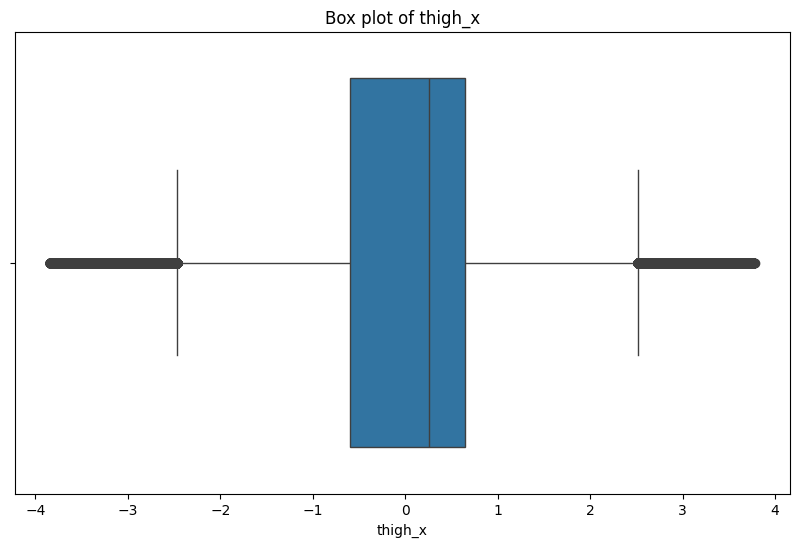

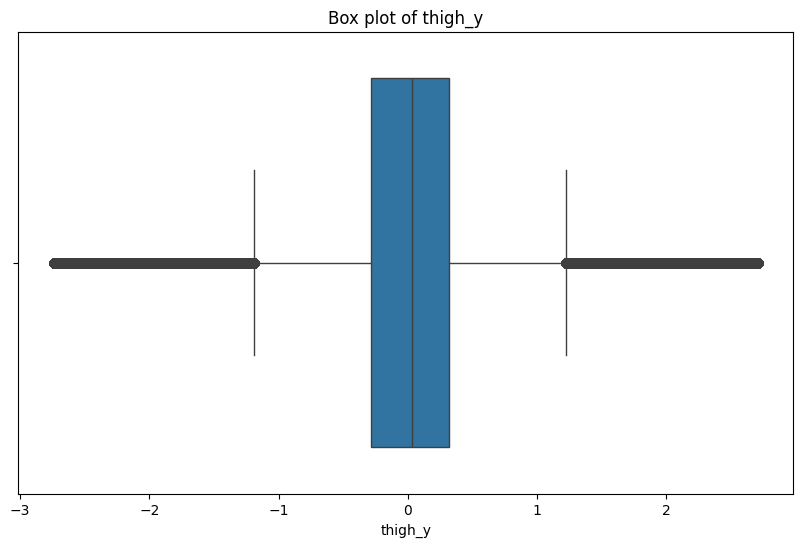

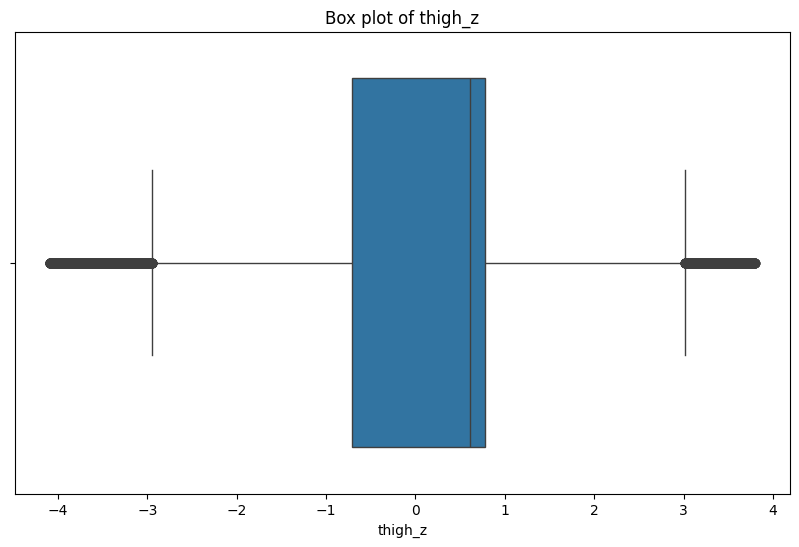

In [4]:
zdata=normal_data_Standard(dnd)
boxplot(zdata,1000)
data_filtered=remove_outliersIQR(zdata,1.5,0.1,0.90) #test me 0.15 k 0.85
boxplot(data_filtered,1000)

In [7]:
countofActivity=data_filtered['label'].value_counts()
print(countofActivity)

label
7     2897576
1     1117383
6      742534
9      392735
3      253323
8      190810
2      156098
4       74724
5       63364
10      52848
11      41668
12       7853
Name: count, dtype: int64


## Balance dataset and see distribution

(84000, 7)
(84000, 9)


/home/lefteris/.local/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


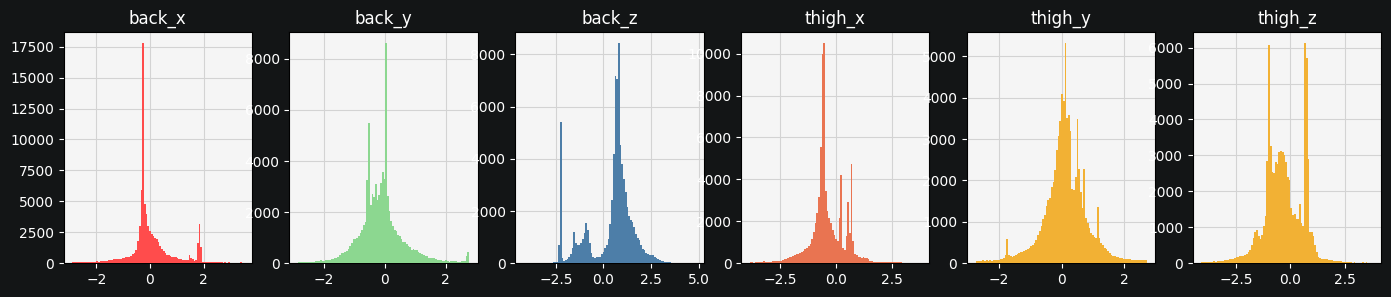

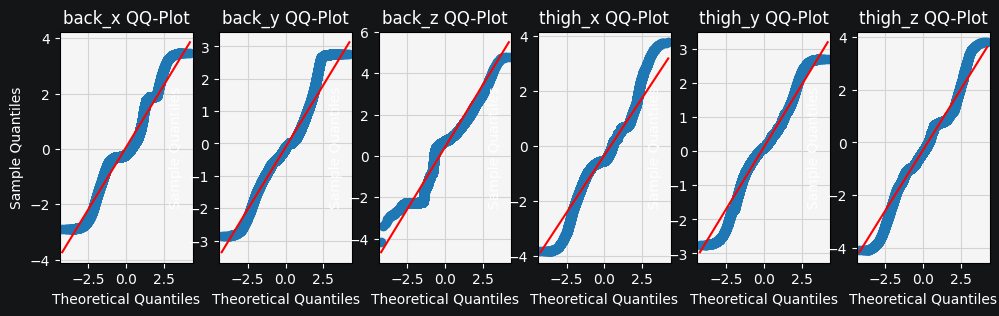

In [8]:
data_filtered_balanced=get_balanced_dataset(data_filtered)
bdata=get_balanced_dataset(data) # lathos isos
plot_histograms_qqplots(data_filtered_balanced)


# Correlation Analysis

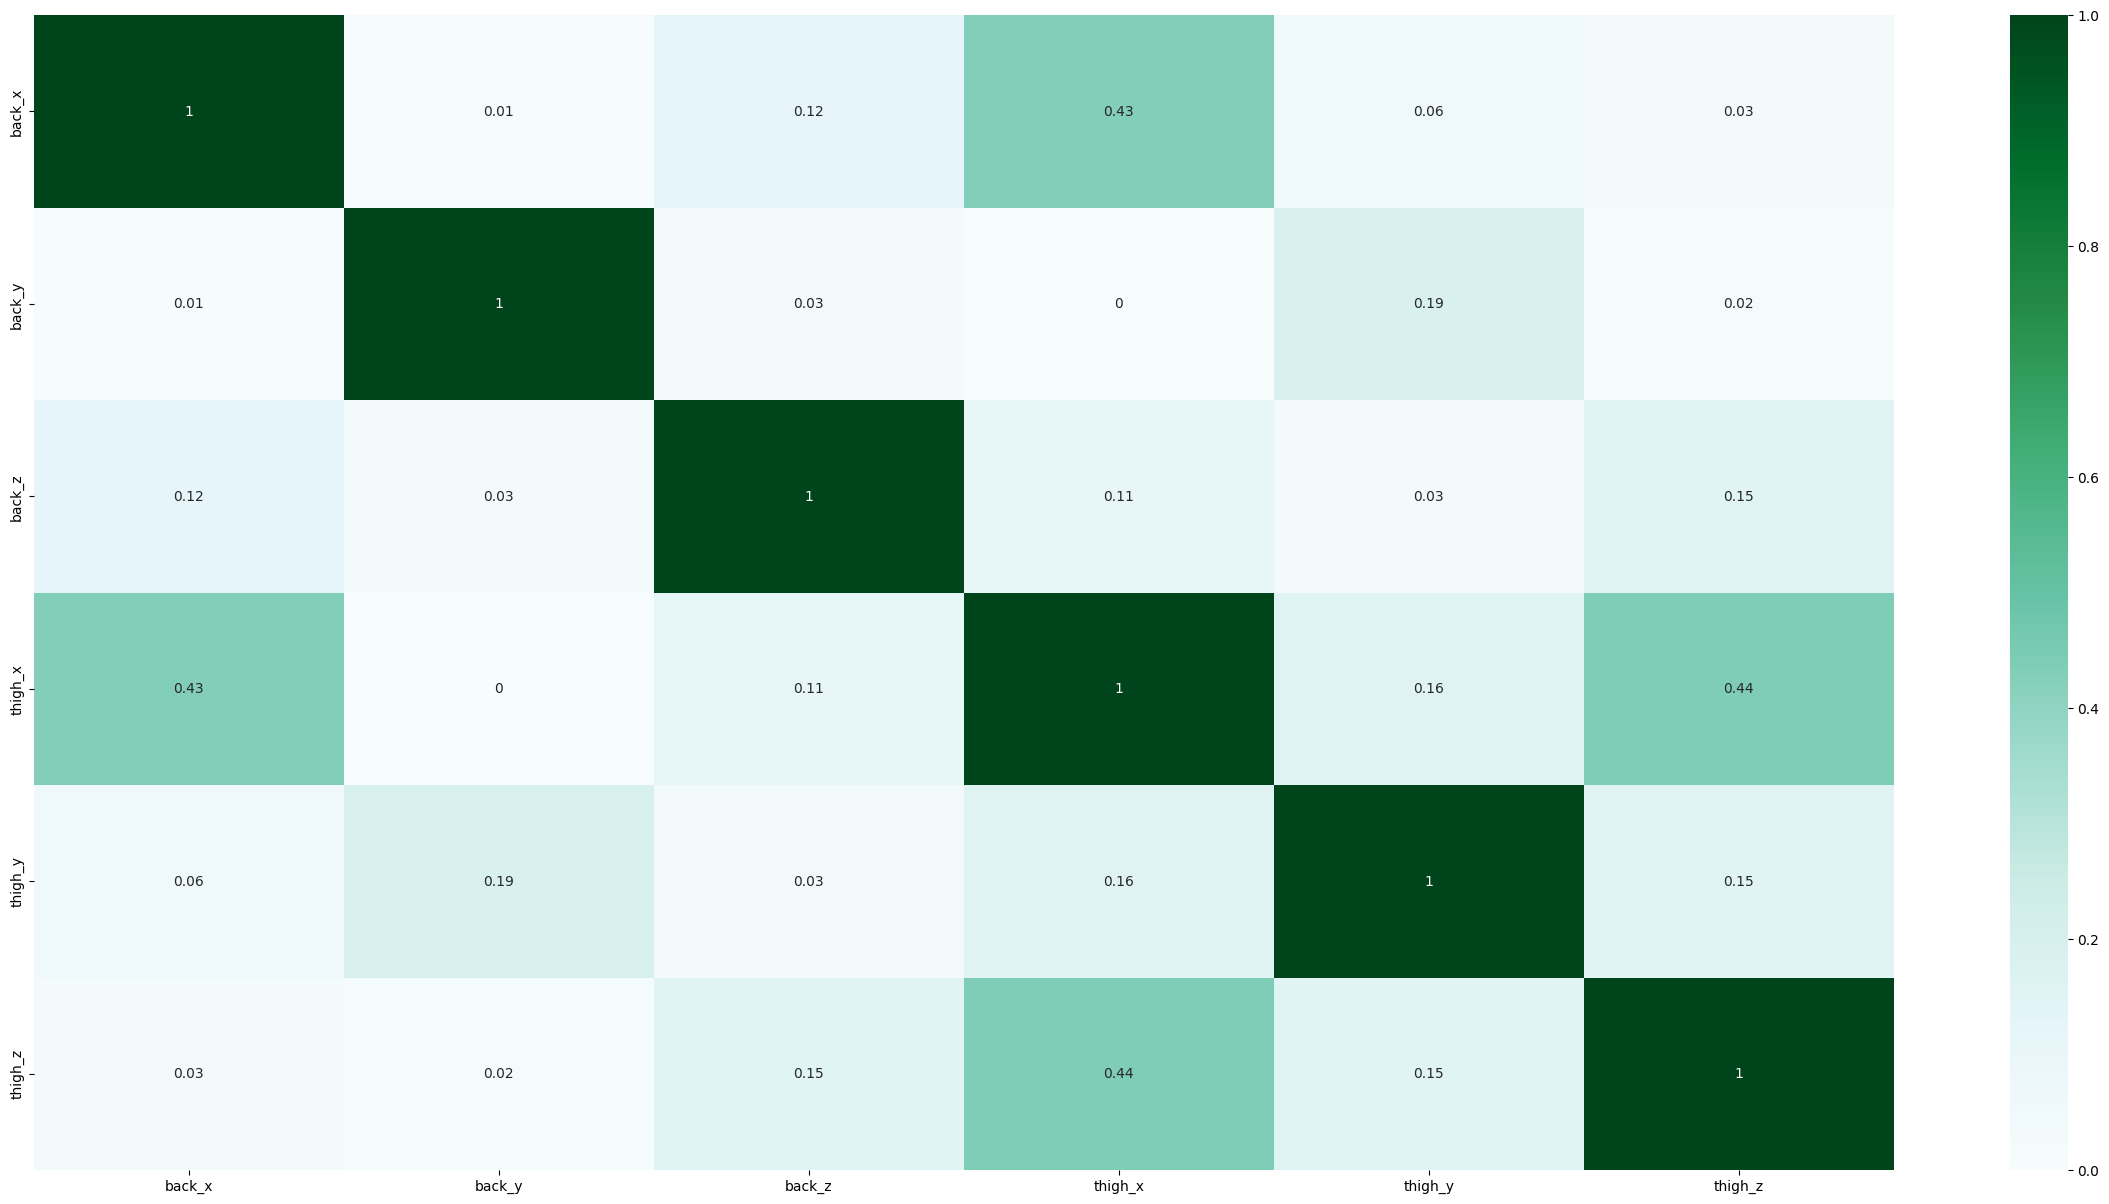

In [9]:
create_corr_matrix(zdata)

## Let's see how each class looks like

### Walking

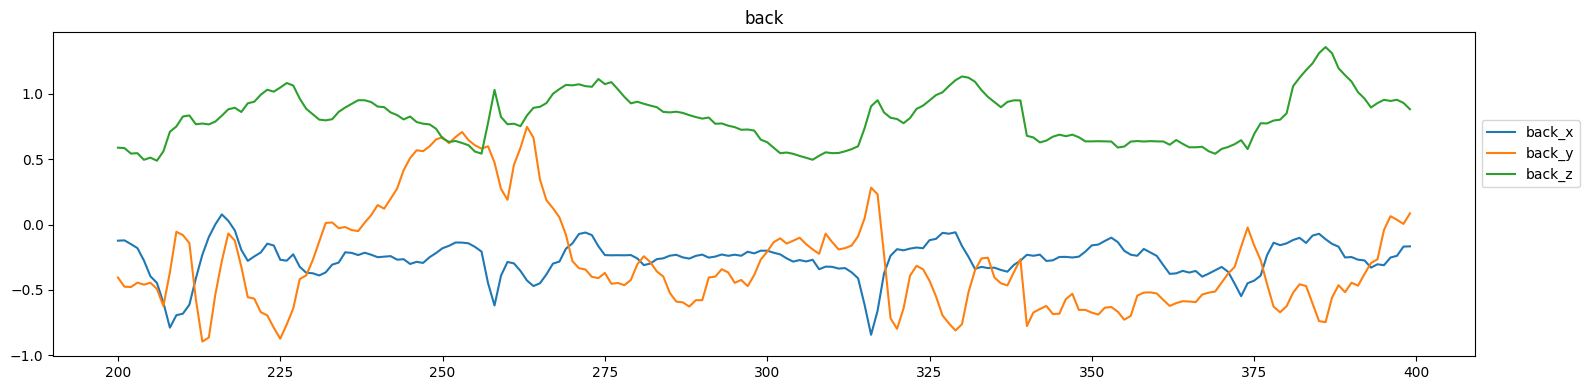

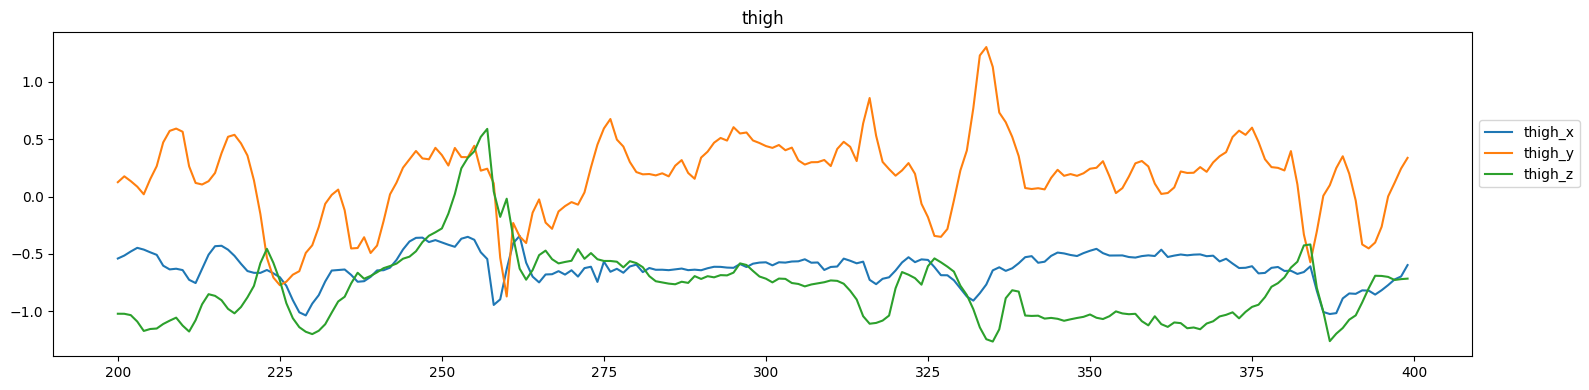

In [10]:
plot_activity(1,zdata,200)

### Running

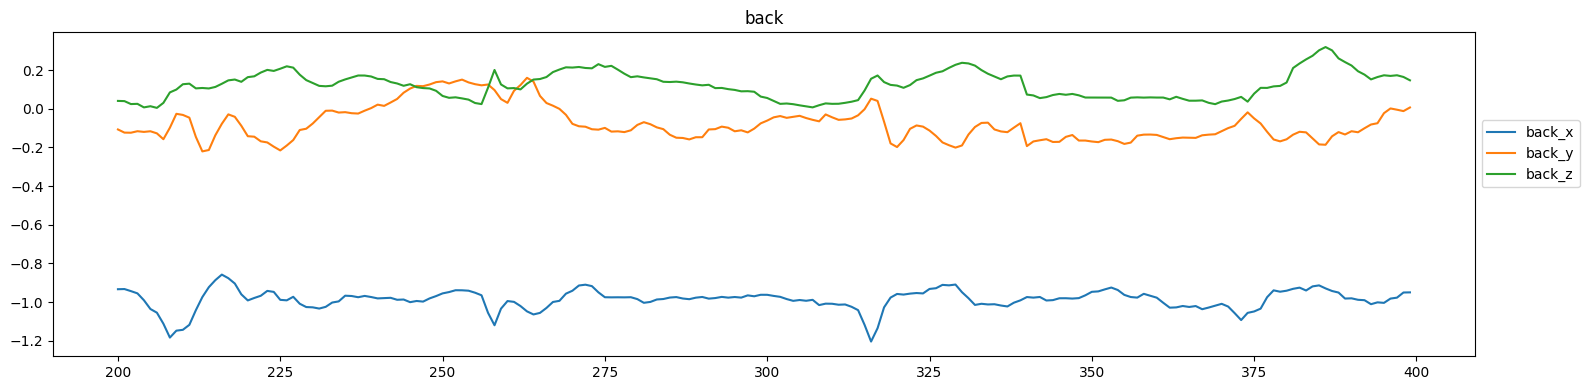

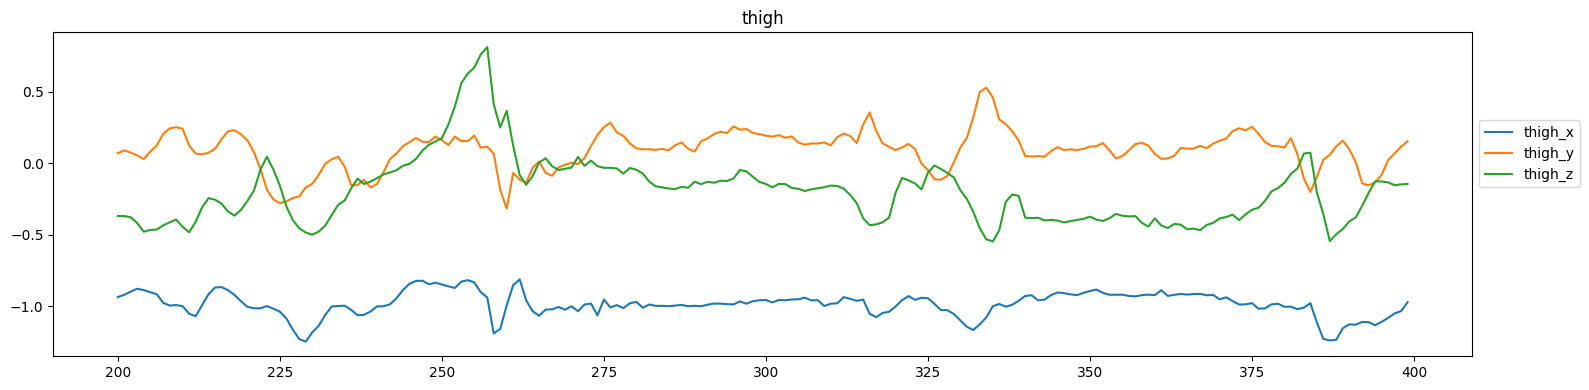

In [11]:
plot_activity(1,data,200)

# CLASSIFICATION

### 2D CONVOLUTIONAL NEURAL NETWORK

In [12]:
data_new,labels=window_data(200,50,zdata)
reshaped_data = np.asarray(data_new)
labels_ar=np.asarray(labels)
reshaped_data = reshaped_data.astype(float).reshape(-1, 200, 6)
reshaped_data_nn=reshaped_data.reshape(-1,200,6,1)
model, evaluation_results = nn(reshaped_data_nn, labels_ar)
print("Evaluation results:", evaluation_results)

(200, 6, 1)
(34342,)


/home/lefteris/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-05-22 12:33:25.784357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 12:33:25.787965: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 12:33:25.793059:

Epoch 1/10


L355
2024-05-22 12:33:25.906663: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 12:33:25.907745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 12:33:25.908718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12974 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1716370406.537724   40701 service.cc:145] XL

 224/1074 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7630 - loss: 0.8821

I0000 00:00:1716370408.312171   40701 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1074/1074 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8543 - loss: 0.5235 - val_accuracy: 0.9256 - val_loss: 0.2127
Epoch 2/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.9225 - loss: 0.2299 - val_accuracy: 0.9387 - val_loss: 0.1766
Epoch 3/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9369 - loss: 0.1865 - val_accuracy: 0.9390 - val_loss: 0.1757
Epoch 4/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9426 - loss: 0.1669 - val_accuracy: 0.9413 - val_loss: 0.1733
Epoch 5/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9514 - loss: 0.1406 - val_accuracy: 0.9430 - val_loss: 0.1712
Epoch 6/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9607 - loss: 0.1178 - val_accuracy: 0.9394 - val_loss: 0.1922
Epoch 7/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9652 - loss: 0.0997 - val_accuracy: 0.9446 - val_loss: 0.1884
Epoch 8/10
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9693 - loss: 0.0880 - val_accur

### RANDOM FOREST ALGORITHM

In [8]:
random_forest_data1=get_balanced_dataset(zdata,100000)
random_forest_data2=get_balanced_dataset(data_filtered,150000)

(1298934, 7)
(1290457, 7)


/home/lefteris/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8004557579863504
F1 score: 0.796296814366498


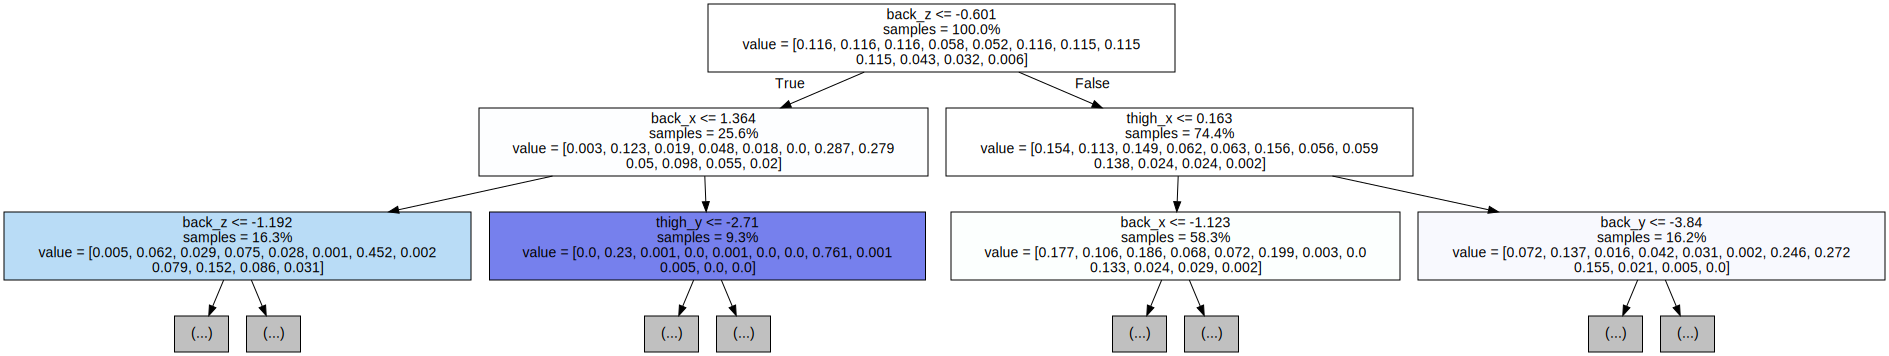

In [9]:
display(random_forest(random_forest_data1[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']],random_forest_data1[['label']]))

### BAYESIAN NETWORK

In [8]:
bayesian_network_data=descritize_by_bounds(zdata[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']])
bayesian_network_data['labels']=zdata['label']
print(bayesian_network_data.shape)


(6439387, 7)


In [9]:
print(bayesian_network_data)

        back_x back_y    back_z    thigh_x thigh_y thigh_z  labels
0          avg    avg      high        low     avg     low       6
1          avg    avg      high        low     avg     low       6
2          avg    avg      high        low     avg     low       6
3          avg    avg      high        low     avg     low       6
4          avg    avg      high        low     avg     low       6
...        ...    ...       ...        ...     ...     ...     ...
6461323   high    avg       low       high     avg    high       7
6461324    avg    avg       low       high     avg    high       7
6461325   high    avg       low       high     avg    high       7
6461326    avg    avg       low       high     avg    high       7
6461327   high    avg  very low  very high     avg    high       7

[6439387 rows x 7 columns]


In [10]:
model,accuracy=bay_net_structure(bayesian_network_data)

  0%|          | 11/1000000 [00:07<193:39:26,  1.43it/s]


Learned structure edges: [('back_x', 'back_z'), ('back_x', 'thigh_x'), ('back_z', 'thigh_z'), ('back_z', 'thigh_y'), ('thigh_y', 'back_y'), ('labels', 'thigh_z'), ('labels', 'thigh_x'), ('labels', 'back_x'), ('labels', 'thigh_y'), ('labels', 'back_y'), ('labels', 'back_z')]
Model CPDs: [<TabularCPD representing P(back_x:5 | labels:12) at 0x7308c97ce110>, <TabularCPD representing P(back_y:5 | labels:12, thigh_y:5) at 0x7308c97cec20>, <TabularCPD representing P(back_z:5 | back_x:5, labels:12) at 0x7308c97ce290>, <TabularCPD representing P(thigh_x:5 | back_x:5, labels:12) at 0x7308c97cff40>, <TabularCPD representing P(thigh_y:5 | back_z:5, labels:12) at 0x7308c97cc820>, <TabularCPD representing P(thigh_z:5 | back_z:5, labels:12) at 0x7308c97cead0>, <TabularCPD representing P(labels:12) at 0x7308c97ccfd0>]


100%|██████████| 11700/11700 [00:00<00:00, 18186.09it/s]


Predictive Accuracy: 0.8116607318395065
F1 score: 0.7895865487247842


# CLUSTERING 

### Mini Batch K-Means

(117853, 7)
0.38641142038161314


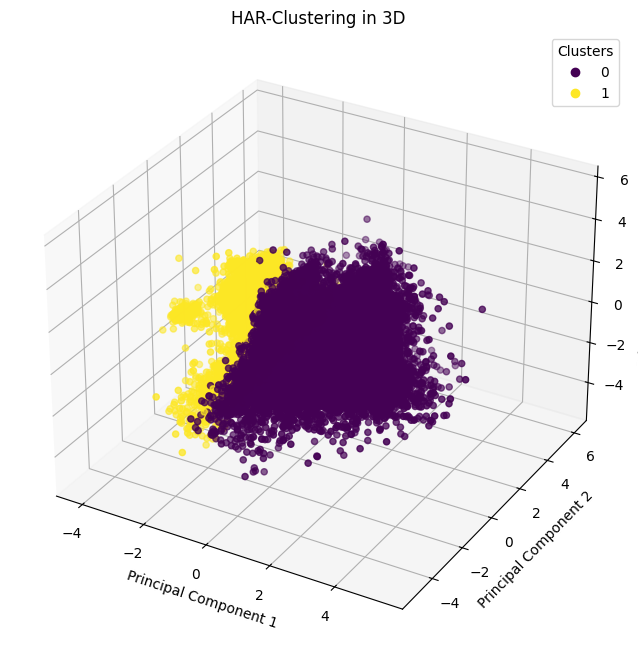

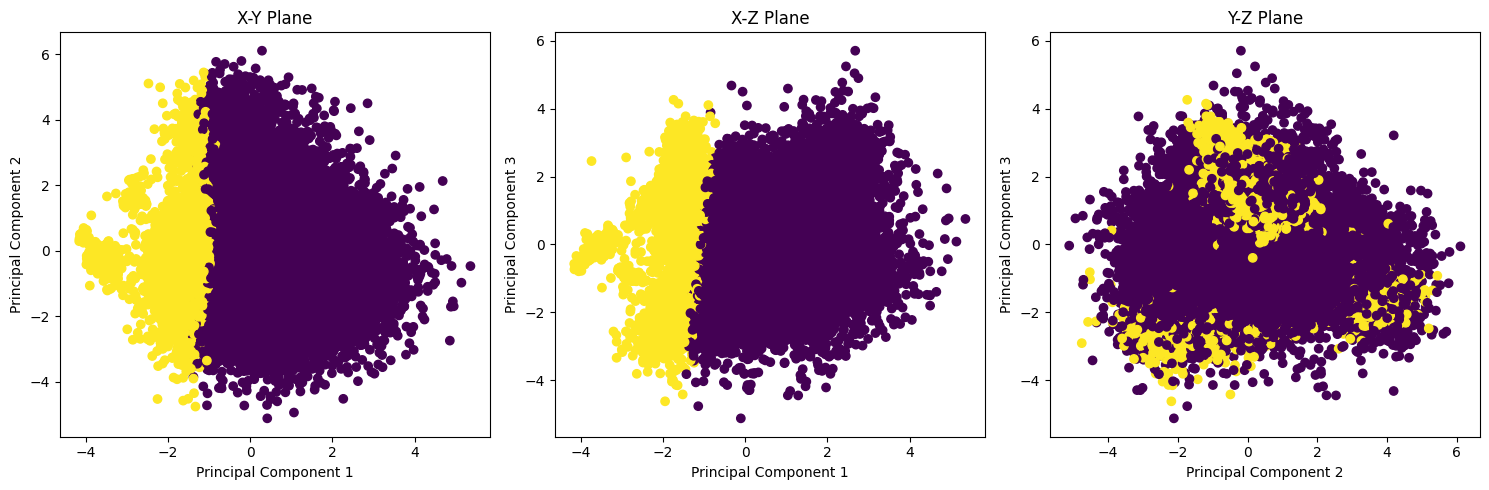

real_labels  clusters
1            0           10000
6            0           10000
9            0           10000
8            1           10000
7            0           10000
3            0           10000
4            0            9846
5            0            9692
2            0            8909
11           0            7716
10           0            7102
12           0            4643
             1            3210
10           1            2898
11           1            2284
2            1            1091
5            1             308
4            1             154
Name: count, dtype: int64


In [8]:
data_filtered_balanced=get_balanced_dataset(data_filtered,10000)
X_data_kmeans=data_filtered_balanced[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
Y_data_kmeans=data_filtered_balanced['label']


# kmeanshillouete=[]
# for i in range(2,13):
#     labels_kmeans,validationdb_df,shil=minibatch_kmeans(X_data_kmeans,Y_data_kmeans,i)
#     kmeanshillouete.append(shil)

labels_kmeans,validationdb_df,shil=minibatch_kmeans(X_data_kmeans,Y_data_kmeans,2)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_kmeans,3)
cluster3D(x,labels_kmeans)
cluster2D(x,labels_kmeans)
print(val_db)

### DBSCAN

In [ ]:
X_data_db=X_data_kmeans.copy()
Y_data_db=Y_data_kmeans.copy()

labels_dbscan,validationdb_df,shil=dbscan(X_data_db,Y_data_db)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_db,3)
cluster3D(x,labels_dbscan)
cluster2D(x,labels_dbscan)
print(val_db)

### BIRCH

(84000, 7)
BIRCH silouette score --->0.33585363276960806
BIRCH silouette score --->0.1924948512554989
BIRCH silouette score --->0.19883399096059523
BIRCH silouette score --->0.18816919963696543
BIRCH silouette score --->0.20691295872835733
BIRCH silouette score --->0.21050585680736406
BIRCH silouette score --->0.1830996154539441
BIRCH silouette score --->0.16742132636217766
BIRCH silouette score --->0.17383393976374817
BIRCH silouette score --->0.2029537165027523
BIRCH silouette score --->0.2149890094892147


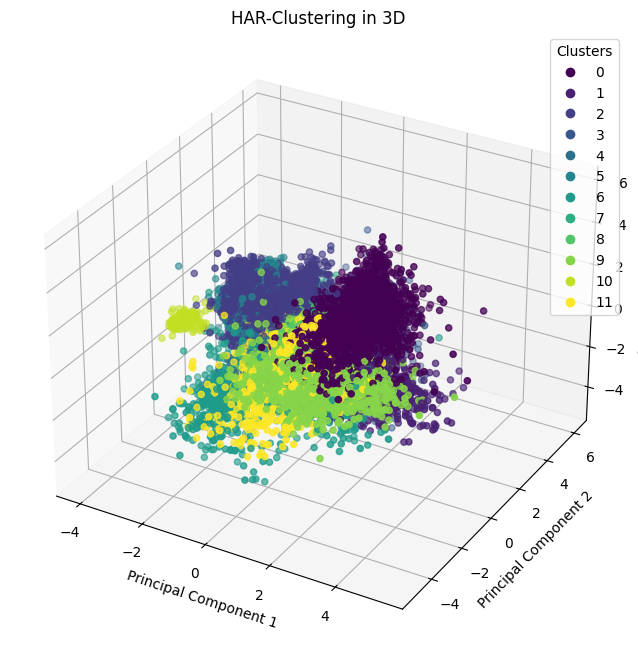

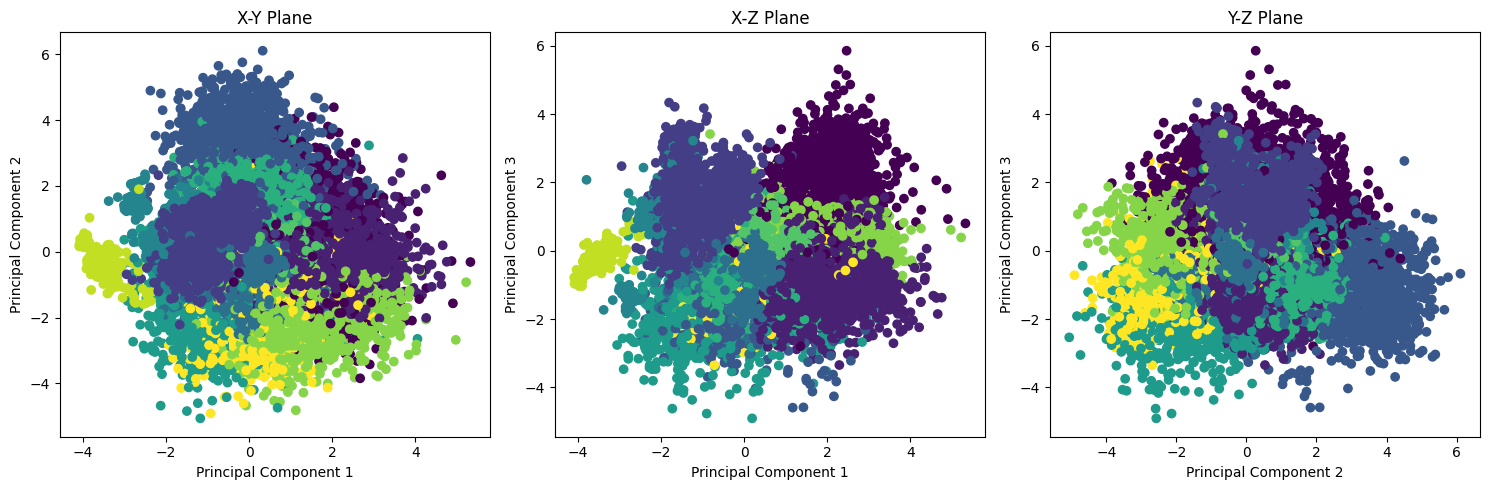

real_labels  clusters
7            4           7000
8            10          6212
12           2           5840
6            8           5836
9            9           4702
                         ... 
3            6              2
10           10             2
9            6              2
4            5              2
1            2              1
Name: count, Length: 99, dtype: int64


In [5]:
data_filtered_bir=get_balanced_dataset(data_filtered,7000)
X_data_bir=data_filtered_bir[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']]
Y_data_bir=data_filtered_bir['label']
shilloute=[0.33585363276960806,0.1924948512554989,0.19883399096059523,0.18816919963696543,0.20691295872835733,0.21050585680736406,0.1830996154539441,0.16742132636217766,0.17383393976374817,0.2029537165027523,0.2149890094892147]
for i in range(2,13):
    labels_birch,validationdb_df,shil=birch(X_data_bir,Y_data_bir,i,0.01,50)
    shilloute.append(shil)

val_db=validationdb_df.value_counts()

x=pca_test(X_data_bir,3)
cluster3D(x,labels_birch)
cluster2D(x,labels_birch)
print(val_db)